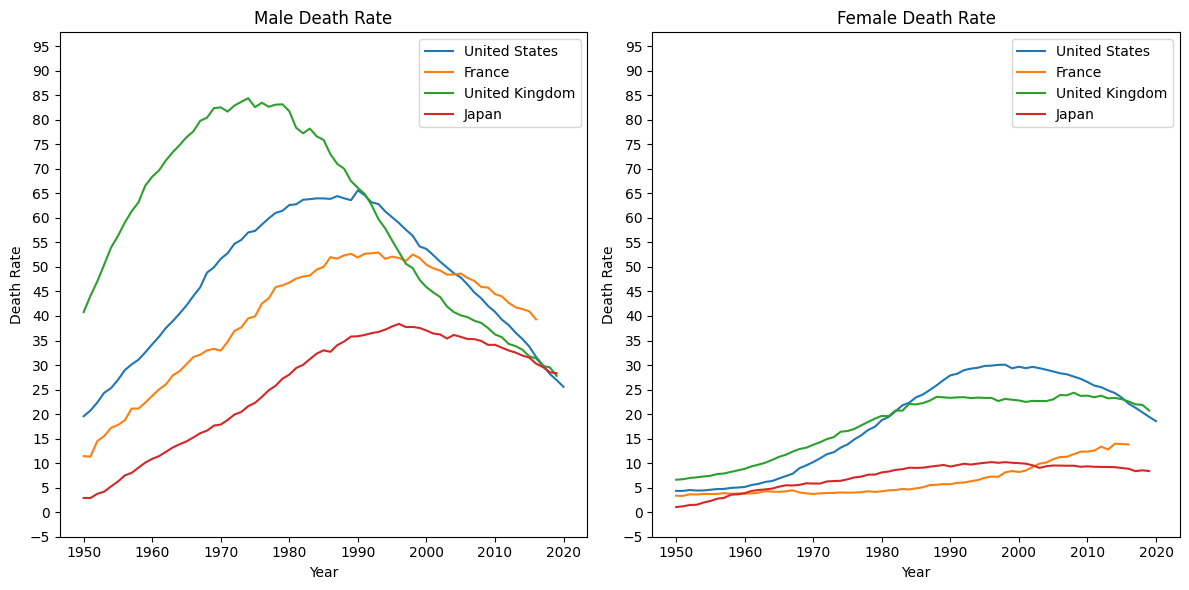

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# CSVファイルのパス
file_path = r"C:\Users\Kento\Documents\Exeter\python\dataset for the blog\lung-cancer-deaths-men-women.csv"

# 列の名前
column_names = ['Entity', 'Code', 'Year', 'death_rate_male', 'death_rate_female']

# CSVファイルを読み込み、データフレームを作成
df = pd.read_csv(file_path, names=column_names)

# 最初の行を削除
df = df.iloc[1:]

# 'Year'列を整数型に変換
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
# 'death_rate_male', 'death_rate_female' 列を数値に変換
df['death_rate_male'] = pd.to_numeric(df['death_rate_male'], errors='coerce')
df['death_rate_female'] = pd.to_numeric(df['death_rate_female'], errors='coerce')
# 欠損値を直前の値で補完
df.ffill(inplace=True)
# 五か国のリスト
selected_countries = ['United States', 'France', 'United Kingdom', 'Japan']

# グラフのサイズを指定
plt.figure(figsize=(12, 6))

# 選択された年
selected_years = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2016]

# 各国のデータに含まれる死亡率の最小値と最大値を計算
min_value = df[['death_rate_male', 'death_rate_female']].min().min()  
max_value = df[['death_rate_male', 'death_rate_female']].max().max() 

# 男性の死亡率グラフ
plt.subplot(1, 2, 1)  # 1行2列の1番目のグラフ
plt.title('Male Death Rate')  # グラフのタイトル
plt.xlabel('Year')  # x軸ラベル
plt.ylabel('Death Rate')  # y軸ラベル
plt.ylim(min_value - 5, max_value + 5)  # 縦軸の範囲を設定
plt.yticks(range(int(min_value) - 5, int(max_value) + 6, 5))  # 縦軸に目盛りを追加
for country in selected_countries:
    country_data = df[df['Entity'] == country]   
    plt.plot(country_data['Year'], country_data['death_rate_male'], label=country)  # 男性の死亡率をプロット
plt.legend()  # 凡例を表示

# 女性の死亡率グラフ
plt.subplot(1, 2, 2)  # 1行2列の2番目のグラフ
plt.title('Female Death Rate')  # グラフのタイトル
plt.xlabel('Year')  # x軸ラベル
plt.ylabel('Death Rate')  # y軸ラベル
plt.ylim(min_value - 5, max_value + 5)  # 縦軸の範囲を設定
plt.yticks(range(int(min_value) - 5, int(max_value) + 6, 5))  # 縦軸に目盛りを追加
for country in selected_countries:
    country_data = df[df['Entity'] == country] 
    plt.plot(country_data['Year'], country_data['death_rate_female'], label=country)  # 女性の死亡率をプロット
plt.legend()  # 凡例を表示
plt.savefig('Death_rate.png')
plt.tight_layout()  # レイアウト調整
plt.show()  # グラフを表示

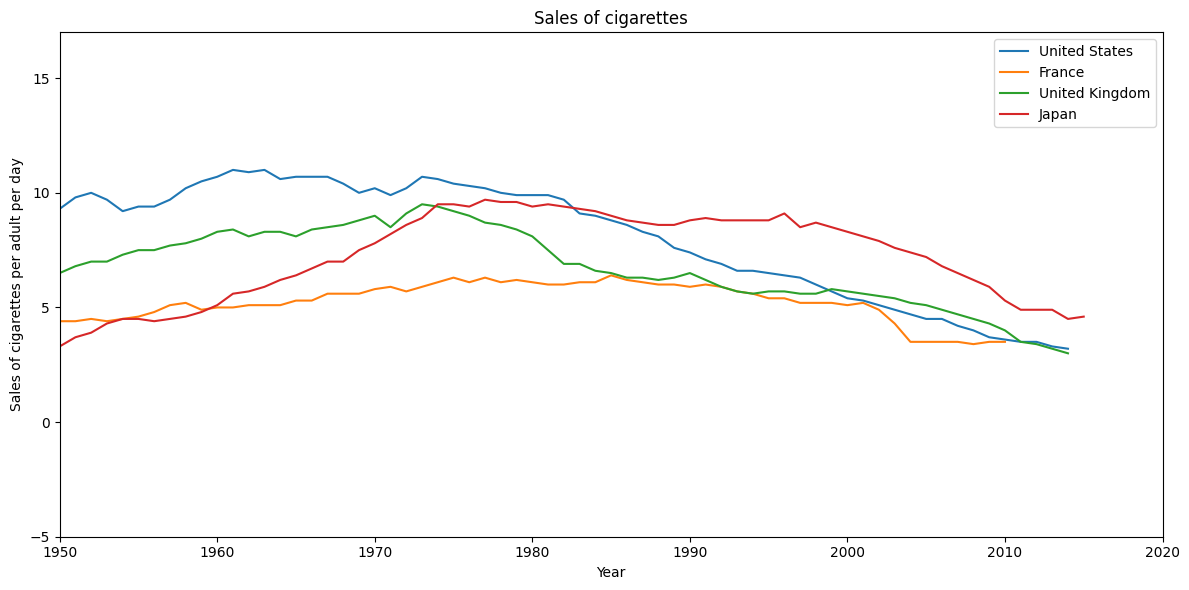

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルのパス
file_path = r"C:\Users\Kento\Documents\Exeter\python\dataset for the blog\sales-of-cigarettes-per-adult-per-day.csv"

# 列の名前
column_names = ['Entity', 'Code', 'Year', 'Sales of cigarettes per adult per day']

# CSVファイルを読み込み、データフレームを作成
dfa = pd.read_csv(file_path, names=column_names)

# 最初の行を削除
dfa = dfa.iloc[1:]

# 'Year'列を整数型に変換
dfa['Year'] = pd.to_numeric(dfa['Year'], errors='coerce')
# 'Sales of cigarettes per adult per day' 列を数値に変換
dfa['Sales of cigarettes per adult per day'] = pd.to_numeric(dfa['Sales of cigarettes per adult per day'], errors='coerce')
# 欠損値を直前の値で補完
dfa.ffill(inplace=True)

# 五か国のリスト
selected_countries = ['United States', 'France', 'United Kingdom', 'Japan']

# グラフのサイズを指定
plt.figure(figsize=(12, 6))

# 選択された年
selected_years = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2016]

# 各国のデータに含まれるタバコ購買率の最小値と最大値を計算
min_value = dfa[['Sales of cigarettes per adult per day']].min().min()
max_value = dfa[['Sales of cigarettes per adult per day']].max().max()

# タバコ購買率グラフ
plt.title('Sales of cigarettes')  # グラフのタイトル
plt.xlabel('Year')  # x軸ラベル
plt.xlim(1950,2020)
plt.ylabel('Sales of cigarettes per adult per day')  # y軸ラベル
plt.ylim(min_value - 5, max_value + 5)  # 縦軸の範囲を設定
plt.yticks(range(int(min_value) - 5, int(max_value) + 6, 5))  # 縦軸に目盛りを追加
for country in selected_countries:
    country_data = dfa[dfa['Entity'] == country]    
    plt.plot(country_data['Year'], country_data['Sales of cigarettes per adult per day'], label=country)  # 男性の死亡率をプロット
plt.legend()  # 凡例を表示

plt.tight_layout()  # レイアウト調整
plt.savefig('Sales_of_cigarettes.png')
plt.show()  # グラフを表示

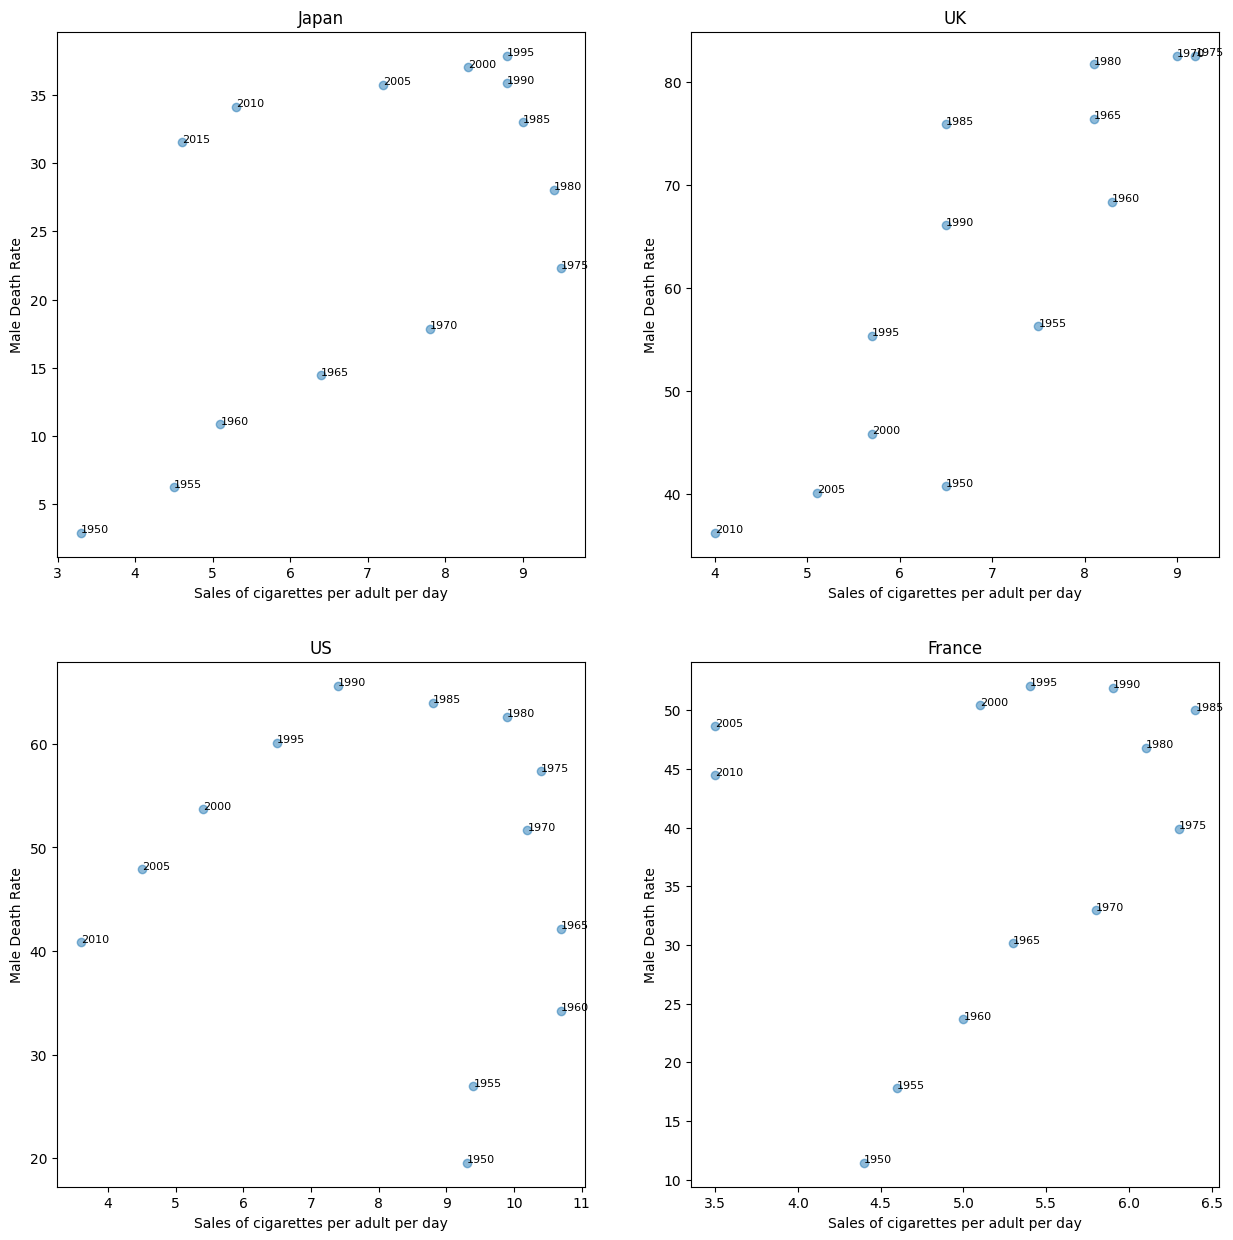

In [3]:
plt.figure(figsize=(15, 15))  # グラフ全体のサイズを設定

# 日本のデータのみを抽出
df_Japan = df[df['Entity'] == 'Japan']
# 日本のデータのみを抽出
dfa_Japan = dfa[dfa['Entity'] == 'Japan']

# タバコ購買率と男性の死亡率のデータを統合する
merged_df_Japan = pd.merge(dfa_Japan, df_Japan, on='Year', how='inner')

filtered_df_Japan = merged_df_Japan[(merged_df_Japan['Year'] >= 1950) & (merged_df_Japan['Year'] <= 2015) & (merged_df_Japan['Year'] % 5 == 0)]

# 散布図をプロット
plt.subplot(2,2,1)
plt.scatter(filtered_df_Japan['Sales of cigarettes per adult per day'], filtered_df_Japan['death_rate_male'], alpha=0.5)
# グラフに5年ごとの年を示すラベルを追加
for i, year in enumerate(filtered_df_Japan['Year']):
    # 5年ごとのデータのみにラベルを追加する
    if year % 5 == 0:
        plt.text(filtered_df_Japan['Sales of cigarettes per adult per day'].iloc[i], filtered_df_Japan['death_rate_male'].iloc[i], str(year), fontsize=8)
# グラフのタイトルとラベルを設定
plt.title('Japan')
plt.xlabel('Sales of cigarettes per adult per day')
plt.ylabel('Male Death Rate')


# イギリスのデータのみを抽出
df_UnitedKingdom = df[df['Entity'] == 'United Kingdom']
# イギリスのデータのみを抽出
dfa_UnitedKingdom = dfa[dfa['Entity'] == 'United Kingdom']

# タバコ購買率と男性の死亡率のデータを統合する
merged_df_UnitedKingdom = pd.merge(dfa_UnitedKingdom, df_UnitedKingdom, on='Year', how='inner')

filtered_df_UnitedKingdom = merged_df_UnitedKingdom[(merged_df_UnitedKingdom['Year'] >= 1950) & (merged_df_UnitedKingdom['Year'] <= 2015) & (merged_df_UnitedKingdom['Year'] % 5 == 0)]

# 散布図をプロット
plt.subplot(2,2,2)
plt.scatter(filtered_df_UnitedKingdom['Sales of cigarettes per adult per day'], filtered_df_UnitedKingdom['death_rate_male'], alpha=0.5)
# グラフに5年ごとの年を示すラベルを追加
for i, year in enumerate(filtered_df_UnitedKingdom['Year']):
    # 5年ごとのデータのみにラベルを追加する
    if year % 5 == 0:
        plt.text(filtered_df_UnitedKingdom['Sales of cigarettes per adult per day'].iloc[i], filtered_df_UnitedKingdom['death_rate_male'].iloc[i], str(year), fontsize=8)
# グラフのタイトルとラベルを設定
plt.title('UK')
plt.xlabel('Sales of cigarettes per adult per day')
plt.ylabel('Male Death Rate')


# アメリカのデータのみを抽出
df_UnitedStates = df[df['Entity'] == 'United States']
# アメリカのデータのみを抽出
dfa_UnitedStates = dfa[dfa['Entity'] == 'United States']

# タバコ購買率と男性の死亡率のデータを統合する
merged_df_UnitedStates = pd.merge(dfa_UnitedStates, df_UnitedStates, on='Year', how='inner')
filtered_df_UnitedStates = merged_df_UnitedStates[(merged_df_UnitedStates['Year'] >= 1950) & (merged_df_UnitedStates['Year'] <= 2015) & (merged_df_UnitedStates['Year'] % 5 == 0)]

# 散布図をプロット 
plt.subplot(2,2,3)
plt.scatter(filtered_df_UnitedStates['Sales of cigarettes per adult per day'], filtered_df_UnitedStates['death_rate_male'], alpha=0.5)
# グラフに5年ごとの年を示すラベルを追加
for i, year in enumerate(filtered_df_UnitedStates['Year']):
    # 5年ごとのデータのみにラベルを追加する
    if year % 5 == 0:
        plt.text(filtered_df_UnitedStates['Sales of cigarettes per adult per day'].iloc[i], filtered_df_UnitedStates['death_rate_male'].iloc[i], str(year), fontsize=8)
# グラフのタイトルとラベルを設定
plt.title('US')
plt.xlabel('Sales of cigarettes per adult per day')
plt.ylabel('Male Death Rate')


# フランスのデータのみを抽出
df_France = df[df['Entity'] == 'France']
# フランスのデータのみを抽出
dfa_France = dfa[dfa['Entity'] == 'France']

# タバコ購買率と男性の死亡率のデータを統合する
merged_df_France = pd.merge(dfa_France, df_France, on='Year', how='inner')

filtered_df_France = merged_df_France[(merged_df_France['Year'] >= 1950) & (merged_df_France['Year'] <= 2015) & (merged_df_France['Year'] % 5 == 0)]

# 散布図をプロット
plt.subplot(2,2,4)
plt.scatter(filtered_df_France['Sales of cigarettes per adult per day'], filtered_df_France['death_rate_male'], alpha=0.5)
# グラフに5年ごとの年を示すラベルを追加
for i, year in enumerate(filtered_df_France['Year']):
    # 5年ごとのデータのみにラベルを追加する
    if year % 5 == 0:
        plt.text(filtered_df_France['Sales of cigarettes per adult per day'].iloc[i], filtered_df_France['death_rate_male'].iloc[i], str(year), fontsize=8)
# グラフのタイトルとラベルを設定
plt.title('France')
plt.xlabel('Sales of cigarettes per adult per day')
plt.ylabel('Male Death Rate')
plt.savefig('correlation.png')